## Introduction
Length & width of sepal & petal of Iris flower is available. Given the length, width of sepal & petal of a given flower we can predict which category of species the flower belongs to. This is a supervised machine learning problem. The above hypothesis was formulated in 1936 by Sir Ronald Fisher. The Iris dataset is also known as Anderson's dataset as the samples were collected by Edgar Anderson

This dataset is built into scikit-learn. It can be loaded from scikit-learn.

In [108]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sqrt

In [116]:
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [10]:
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [12]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [117]:
x = iris.data

In [118]:
y = iris.target

## Training a Machine Learning Model

 - K nearest Neighbours
 - Four step approach for model training & prediction in scikit-learn
 - Applying this to pattern to other Machine Learning models

In [16]:
print (x.shape)
print (y.shape)

(150, 4)
(150,)


# Scikit-Learn 4 step Modelling pattern

**Step 1** :- Import the class you want to use

In [17]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2** :- Instantiate the Estimator

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

**n_neighbors** is a tuning parameter or hyper-parameter

In [20]:
print (knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


**Step 3** :- Train the Model

In [21]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4**:- Predict the response for new observation

In [26]:
knn.predict([[3,5,4,2]])

array([2])

In [27]:
knn.predict([[3,5,4,2],[4,4,1,1]])

array([2, 0])

## Model Tuning 

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
print (knn.predict([[3,5,4,2]]))
print (knn.predict([[3,5,4,2],[4,4,1,1]]))

[1]
[1 0]


# Use a different Classification Model

In [30]:
from sklearn.linear_model import LogisticRegression

logres = LogisticRegression()

In [32]:
logres.fit(x,y)
print (logres.predict([[3,5,4,2]]))
print (logres.predict([[3,5,4,2],[4,4,1,1]]))

[2]
[2 0]


## Train & Test on the entire dataset

In [33]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
output = knn.predict(x)

In [45]:
np.sum(output == y)/output.size*100

96.66666666666667

In [46]:
logres.fit(x,y)
output = logres.predict(x)
np.sum(output == y)/output.size*100

96.0

In [47]:
from sklearn import metrics

In [48]:
print (metrics.accuracy_score(logres.predict(x), y))

0.96


In [49]:
print (metrics.accuracy_score(knn.predict(x), y))

0.9666666666666667


### Models which overfit the data learn the noise in the data. Maximizing training accuracy rewards overly complex models which don't generalize

In [50]:
from sklearn.cross_validation import train_test_split

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [120]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [121]:
print (metrics.accuracy_score(knn.predict(X_test), Y_test))

0.9666666666666667


In [57]:
logres.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
print (metrics.accuracy_score(logres.predict(X_test), Y_test))

0.9333333333333333


In [139]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10)

In [140]:
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')

In [141]:
scores.mean()

0.9666666666666668

### Finding a better value of k

In [149]:
k_range = range(1,26)
scores = []
for index in k_range:
    knn = KNeighborsClassifier(n_neighbors=index)
    score = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    scores.append(score.mean())

In [150]:
knn = KNeighborsClassifier(n_neighbors=20)
print (cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [151]:
logres = LogisticRegression()
print (cross_val_score(logres, x, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


Text(0,0.5,'Cross Validated Accuracy')

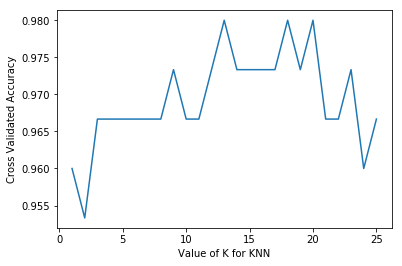

In [146]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

In [67]:
k_range = range(1,26)
scores = []
for index in k_range:
    knn = KNeighborsClassifier(n_neighbors=index)
    knn.fit(X_train, Y_train)
    score = metrics.accuracy_score( Y_test, knn.predict(X_test))
    scores.append(score)

Text(0,0.5,'Testing Accuracy')

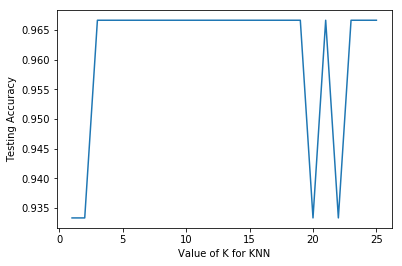

In [68]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Downsides of train-test split procedure
 - Provides high variance estimate of out-of sample accuracy
 - K-fold cross validation overcomes this limitation
 - It's still used because of flexibility & speed

In [76]:
advertising = pd.read_csv('../datasets/Advertising.csv', index_col=0)

In [77]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [78]:
advertising.shape

(200, 4)

## Features
 - TV - amount of money spend on TV advertisements
 - Radio - amount of money spend on Radio advertisements
 - Newspaper - amount of money spend on Newspaper advertisements 

## Labels
 - Sales - Net amount of sales

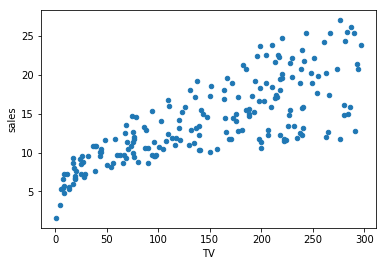

In [82]:
advertising.plot.scatter(x='TV', y='sales')

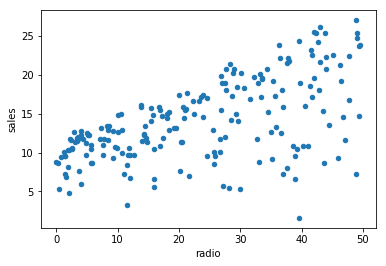

In [83]:
advertising.plot.scatter(x='radio', y='sales')

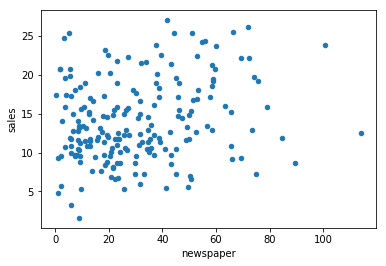

In [84]:
advertising.plot.scatter(x='newspaper', y='sales')

In [85]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [86]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


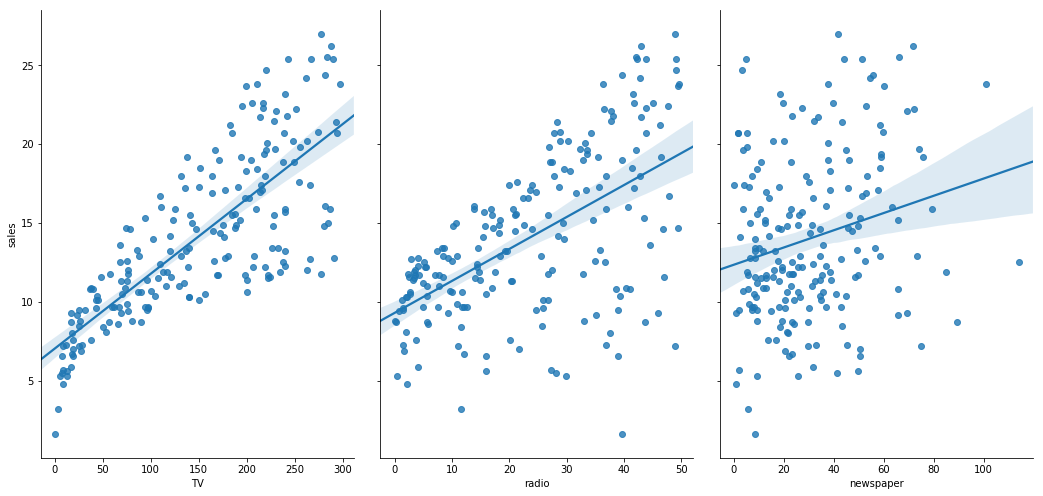

In [90]:
sns.pairplot(advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

### Preparing X, and Y using pandas
 - scikit-learn expects X (feature matrix) and Y (response matrix) to be numpy arrays
 - Since pandas is built on top of numpy, X can be pandas DataFrame and Y can be Series

In [92]:
feature_columns = ['radio', 'newspaper', 'TV']
X = advertising[feature_columns]

In [93]:
Y = advertising['sales']

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

## Linear Regression in scikit-learn

In [98]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
print (linreg.intercept_)

3.0578927887742537


In [101]:
print (linreg.coef_)

[0.17768722 0.00031168 0.04635126]


In [102]:
zip(feature_columns, linreg.coef_)

## Predictions & Evaluation Metrics

In [103]:
y_pred = linreg.predict(X_test)

In [104]:
print (metrics.mean_absolute_error(y_pred, Y_test))

1.211489260646911


In [111]:
print (sqrt(metrics.mean_squared_error(y_pred, Y_test)))

1.4890100982001095


## Remove Newspaper from feature columns

In [115]:
feature_columns = ['radio', 'TV']
X = advertising[feature_columns]
Y = advertising['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
linreg.fit(X_train, Y_train)
y_pred = linreg.predict(X_test)
print (sqrt(metrics.mean_squared_error(y_pred, Y_test)))

1.3982924890777737
